# Import Libraries

In [1]:
import pandas as pd     
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load Data

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Train Data

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Test Data

In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


 #                                                Preprocess Data

Now we will use some preprocess method to ready the dataframe for the machine learning algorithms.
First we will describe the dataframe to gain some insights of the dataframe

# Describe Data

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Columns

In [7]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Number of Missing Value in each Columns

In [8]:
col_names = train_data.columns
for col in col_names:
    print(col + ' - ' + str(train_data[col].isnull().sum()))

PassengerId - 0
Survived - 0
Pclass - 0
Name - 0
Sex - 0
Age - 177
SibSp - 0
Parch - 0
Ticket - 0
Fare - 0
Cabin - 687
Embarked - 2


The 'Age' and 'Cabin' columns have more missing values

# Insights

- 'Survived' is the target column/variable.
- 'PassengerId', 'Name' and 'Ticket' doesn't contribute to the target variable 'Survived'. So, we can remove it from the data.
- 'Age' and 'Embarked' has less number of missing value. We have to use different techniques to fill it.
- As there are a lot of missing values in the column 'Cabin', we can remove it from the training data.
- 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare' doesn't have any missing values. 
- We can also create new variable like 'total size of the family' from the columns 'SibSp' and 'Parch'.

First we will remove the PassengerId and the Cabin class from the dataframe

In [9]:
#remove cabin column from the dataframe
#train_data=train_data.drop('Cabin', axis=1)   

#remove the PassengerId column from the datafram
#train_data=train_data.drop('PassengerId', axis=1) 

# Use Interpolate Method to Fill Missing Value of Age

- Now we will use interpolate function with dataframe to fill the NaN values of the Age column.
as Interpolation can be use with numeric values.

In [10]:
#Interpolate Method With Age column
train_data.interpolate(inplace=True)

#check NaN value in the Age columns which are 0 in number after interpolation.
train_data['Age'].isnull().sum()  

0

# Visualization the 'Survived' (Target Column) 

- As we Know that the Survived columns is imbalance because majority of people are died at titanic

In [11]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

- The Survived people are 342 (0) 
- The UnSurvived people are 549 (1)

### People in each Passenger Class (1, 2, 3)

In [12]:
train_data.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

# Passenger Classes (Pclass) Survived / Not Survived

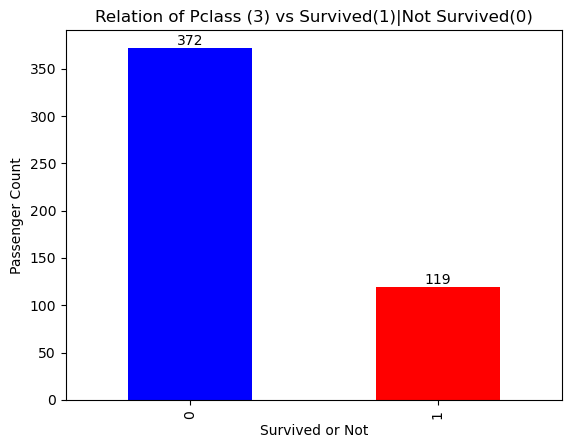

In [13]:
class3 = train_data[train_data['Pclass'] == 3]
class3.Survived.value_counts()
plt = class3.Survived.value_counts().plot(kind='bar', color=['b' , 'r'])
plt.set_xlabel('Survived or Not')
plt.set_ylabel('Passenger Count');
plt.set_title('Relation of Pclass (3) vs Survived(1)|Not Survived(0)');

#to show value of each bar on the bar
for bars in plt.containers:
    plt.bar_label(bars)

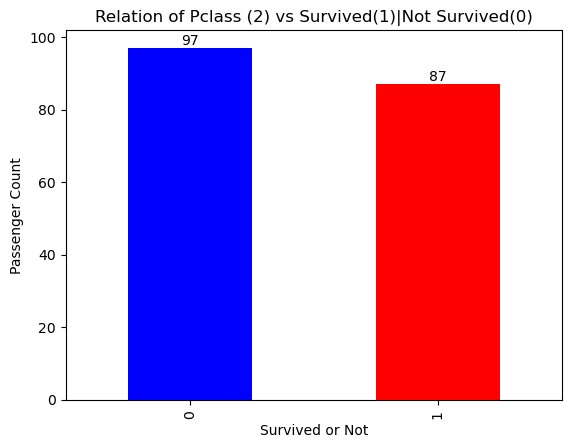

In [14]:
class2 = train_data[train_data['Pclass'] == 2]
class2.Survived.value_counts()
plt = class2.Survived.value_counts().plot(kind='bar', color=['b' , 'r'])
plt.set_xlabel('Survived or Not')
plt.set_ylabel('Passenger Count');
plt.set_title('Relation of Pclass (2) vs Survived(1)|Not Survived(0)');

#to show value of each bar on the bar
for bars in plt.containers:
    plt.bar_label(bars)

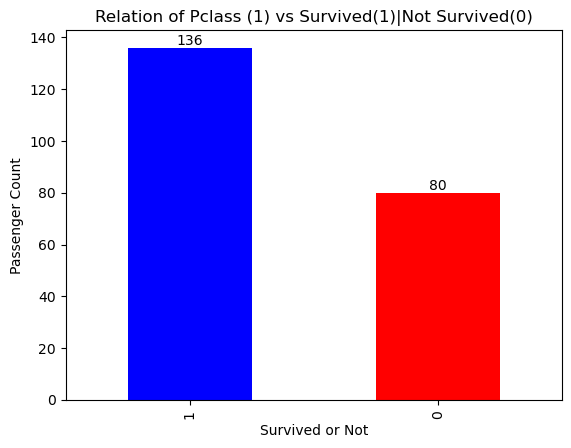

In [15]:
class1 = train_data[train_data['Pclass'] == 1]
class1.Survived.value_counts()
plt = class1.Survived.value_counts().plot(kind='bar', color=['b' , 'r'])
plt.set_xlabel('Survived or Not')
plt.set_ylabel('Passenger Count');
plt.set_title('Relation of Pclass (1) vs Survived(1)|Not Survived(0)');

#to show value of each bar on the bar
for bars in plt.containers:
    plt.bar_label(bars)

# Gender(Sex) Survived / Not Survived

- Count of Male and Female in Titanic

In [16]:
train_data.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

### Male Survived vs Non Survived

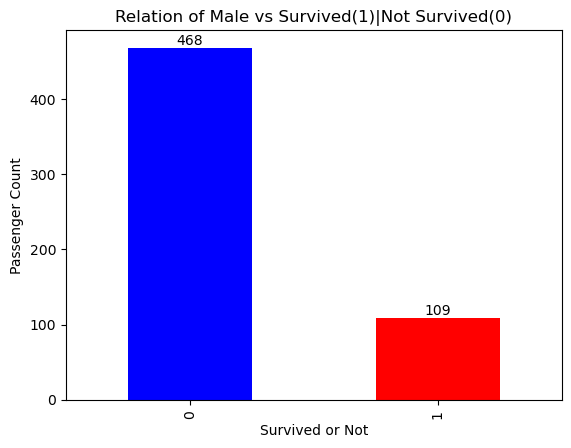

In [17]:
male = train_data[train_data['Sex'] == 'male']
male.Survived.value_counts()
plt = male.Survived.value_counts().plot(kind='bar', color=['b' , 'r'])
plt.set_xlabel('Survived or Not')
plt.set_ylabel('Passenger Count');
plt.set_title('Relation of Male vs Survived(1)|Not Survived(0)');
for bar in plt.containers:
    plt.bar_label(bar)

### Female Survived vs Non Survived 

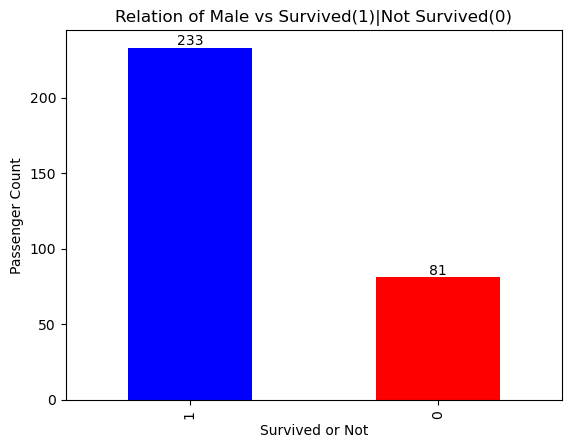

In [18]:
female = train_data[train_data['Sex'] == 'female']
female.Survived.value_counts()
plt = female.Survived.value_counts().plot(kind='bar', color=['b' , 'r'])
plt.set_xlabel('Survived or Not')
plt.set_ylabel('Passenger Count');
plt.set_title('Relation of Male vs Survived(1)|Not Survived(0)');
for bar in plt.containers:
    plt.bar_label(bar)

# Embarked

In [19]:
train_data.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

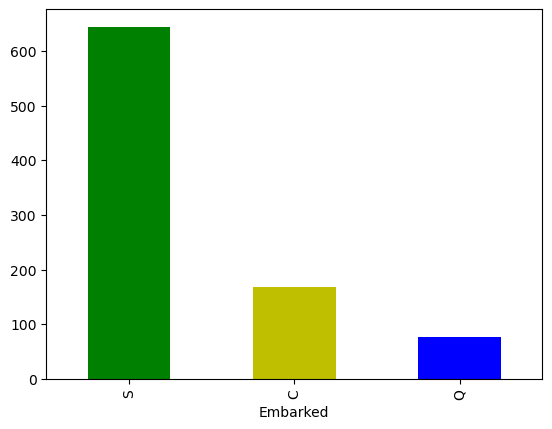

In [20]:
plt = train_data.Embarked.value_counts().plot(kind = 'bar', color = ['g', 'y', 'b'])

### Embarked Survival Probability 

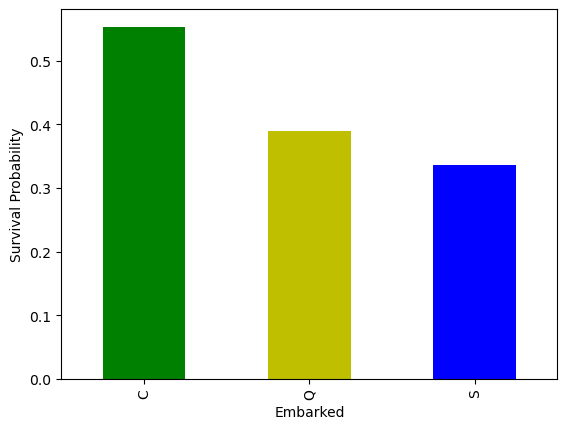

In [21]:
plt = train_data[['Embarked', 'Survived']].groupby('Embarked').mean().Survived.plot(kind = 'bar', color = ['g', 'y', 'b'])
plt.set_xlabel('Embarked')
plt.set_ylabel('Survival Probability');

- The Suvival Prob is
- C > Q > S
- it means that most of the C place people were alive in the Titanic 

### Remove unnecessary columns
- We can remove 'Ticket' and 'PassengerId', as they don't contribute to target class.
- Remove 'Cabin' as it has a lot of missing values in both train and test data

In [22]:
train_data = train_data.drop(columns=['Ticket', 'PassengerId', 'Cabin'])

In [23]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


### Map 'Sex' and 'Embarked' to numerical values.

In [24]:
train_data['Sex'] = train_data['Sex'].map({'male':0, 'female':1})
train_data['Embarked'] = train_data['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [25]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,2.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0.0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,2.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,2.0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,2.0


# Preprocess 'Name'
- Extarct title from name of the passenger and categorize them.
- Drop the column 'Name'

In [26]:
train_data['Title'] = train_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train_data = train_data.drop(columns='Name')

<Axes: xlabel='Title'>

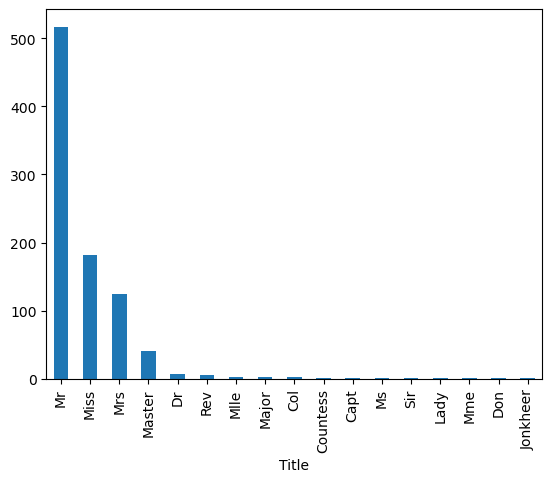

In [27]:
train_data.Title.value_counts().plot(kind = 'bar')

In [28]:
train_data['Title'] = train_data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
train_data['Title'] = train_data['Title'].replace('Ms', 'Miss')
train_data['Title'] = train_data['Title'].replace('Mme', 'Mrs')
train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')

Text(0, 0.5, 'Passenger count')

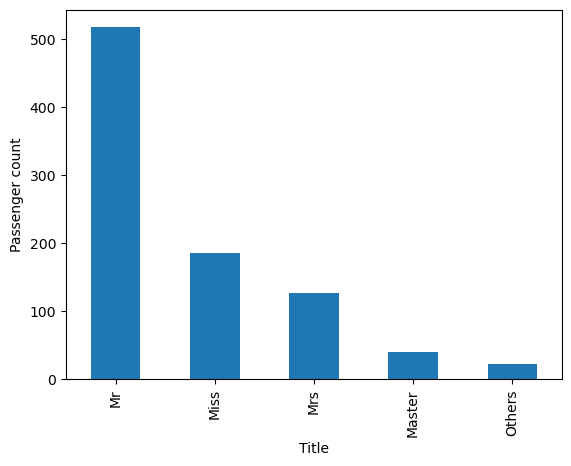

In [29]:
plt = train_data.Title.value_counts().plot(kind = 'bar')
plt.set_xlabel('Title')
plt.set_ylabel('Passenger count')

### Title Survived Probability 

Text(0, 0.5, 'Survival Probability')

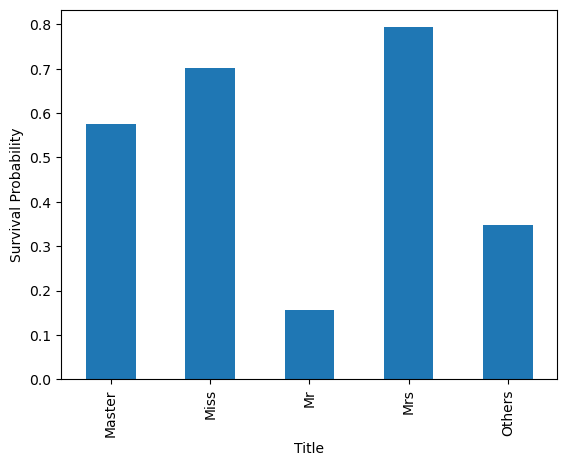

In [30]:
plt = train_data[['Title', 'Survived']].groupby('Title').mean().Survived.plot(kind = 'bar')
plt.set_xlabel('Title')
plt.set_ylabel('Survival Probability')

### Map Title to Numeric Value 

In [31]:
train_data['Title'] = train_data['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})

### Correlation between columns 

In [32]:
corr_matrix = train_data.corr()


<Axes: >

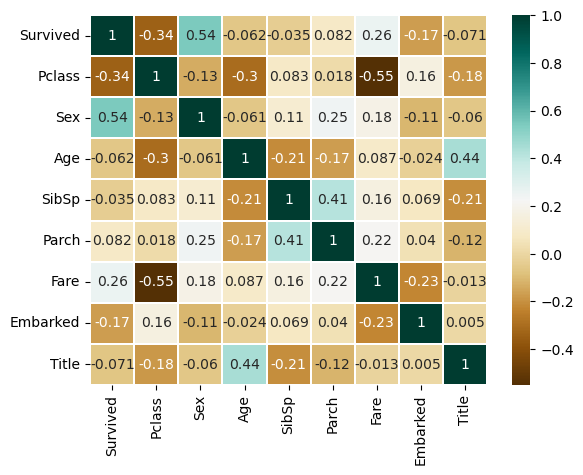

In [33]:
sns.heatmap(data = corr_matrix,cmap='BrBG', annot=True, linewidths=0.2)

### Checking Missing Value

In [34]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Title       0
dtype: int64

- Since Embraked have two missing value we will use fillna() method to fill the require emabarked row

In [35]:
train_data['Embarked'] = train_data['Embarked'].fillna(2)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,2.0,2
1,1,1,1,38.0,1,0,71.2833,0.0,3
2,1,3,1,26.0,0,0,7.9250,2.0,1
3,1,1,1,35.0,1,0,53.1000,2.0,3
4,0,3,0,35.0,0,0,8.0500,2.0,2


In [36]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

- As you can see above all no column have an 'NaN' value

# <center>Pre-Process the Test Data</center>

### Read the test file 

In [37]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### All the Process done for train File can will be apply on test 

In [38]:
#convert sex and Embarked to Numeric Value
test_data['Sex'] = test_data['Sex'].map({'male':0, 'female':1})
test_data['Embarked'] = test_data['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [39]:
#Title Extraction and conversion to Numeric Value
test_data['Title'] = test_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_data = test_data.drop(columns='Name')

test_data['Title'] = test_data['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
test_data['Title'] = test_data['Title'].replace('Ms', 'Miss')
test_data['Title'] = test_data['Title'].replace('Mme', 'Mrs')
test_data['Title'] = test_data['Title'].replace('Mlle', 'Miss')

test_data['Title'] = test_data['Title'].map({'Master':0, 'Miss':1, 'Mr':2, 'Mrs':3, 'Others':4})

In [40]:
#Handling missing value

test_data.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            1
dtype: int64


- Since Cabin have more value which are NaN and can have no effect on the Survived so it will be drop with PassengerId and Tickets

In [41]:
#title to fill
title_mode = train_data.Title.mode()[0]
test_data.Title = test_data.Title.fillna(title_mode)

#fill the Embarked Column
test_data['Embarked'] = test_data['Embarked'].fillna(2)

#Fill Value of Age
test_data.interpolate(inplace=True)

- Remove columns that are of no greater contributer to Survived

In [42]:
#drop columns
test_data = test_data.drop(columns=['Ticket', 'PassengerId', 'Cabin'])

In [43]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,1,2.0
1,3,1,47.0,1,0,7.0000,2,3.0
2,2,0,62.0,0,0,9.6875,1,2.0
3,3,0,27.0,0,0,8.6625,2,2.0
4,3,1,22.0,1,1,12.2875,2,3.0
...,...,...,...,...,...,...,...,...
413,3,0,33.5,0,0,8.0500,2,2.0
414,1,1,39.0,0,0,108.9000,0,2.0
415,3,0,38.5,0,0,7.2500,2,2.0
416,3,0,38.5,0,0,8.0500,2,2.0


In [44]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

- we have no more null value in the Test Data

# Classification Algorithm for Titanic

# Split Data Into Feature and Target Value 

In [57]:
X = train_data.drop(columns='Survived')
y = train_data.Survived
y = pd.DataFrame({'Survived':y.values})

X.shape
y.shape

(891, 1)

In [47]:
X_test = test_data

### Strandardization Data 

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_test = sc.transform(X_test)

(891, 1)

### Train_Test Split

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_t, y_train, y_t = train_test_split(X, y, test_size = 0.2 , random_state = 0)

### KNN Algorithm 

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
acc = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train.values.ravel())
    yhat = knn.predict(X_t)
    acc.append(accuracy_score(y_t,yhat))
    print("For k = ",i," : ",accuracy_score(y_t,yhat))

For k =  1  :  0.7877094972067039
For k =  2  :  0.770949720670391
For k =  3  :  0.8324022346368715
For k =  4  :  0.8324022346368715
For k =  5  :  0.8268156424581006
For k =  6  :  0.8324022346368715
For k =  7  :  0.8435754189944135
For k =  8  :  0.8324022346368715
For k =  9  :  0.8268156424581006
For k =  10  :  0.8212290502793296
For k =  11  :  0.8100558659217877
For k =  12  :  0.8100558659217877
For k =  13  :  0.8100558659217877
For k =  14  :  0.8156424581005587
For k =  15  :  0.8156424581005587
For k =  16  :  0.8268156424581006
For k =  17  :  0.8156424581005587
For k =  18  :  0.8324022346368715
For k =  19  :  0.8268156424581006


- The Best Value for K is selected is 9 because the accuracy score of on is greater than other value

In [70]:
#train a knn model 
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train,y_train.values.ravel())
yhat = knn.predict(X_t)
print("For k = ",i," : ",accuracy_score(y_t,yhat))

- We are given the X_test in the task as seperate file we will find the Survived ratio for it using the same model

In [73]:
y_predict = knn.predict(X_test)
y_predict

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

- After applying a couple of algorithms I found this algorithm best for this task because it has have accuracy than other algorithms like
<ol>
<li>SVM</li>
<li>Logistic Regression</li>
<li>Decision Tree Classifier</li>
 </ol>